# Diagnose change in HH550 visualization between two commits.

In [11]:
import io
import gzip
import requests
import pandas

In [12]:
url = 'https://raw.githubusercontent.com/dhimmel/snplentiful/5238adf66c9a2566e04ca81666fa6b4d47394fa1/data/platforms/combined.tsv'
#new_df = pandas.read_table(gzip.open(io.BytesIO(requests.get(url).content), 'rt'))
new_df = pandas.read_table(url)
new_df.head()

,chromosome,chromosome_start,chromosome_end,entrez_gene_id,snps_hh550,snps_ho1,snps_affy500,snps_exac,snps_kg3
0,chr1,69055,70108,79501,0,0,0,4,10
1,chr1,860260,879955,148398,0,13,0,9,159
2,chr1,879584,894689,26155,0,22,0,21,125
3,chr1,895967,901095,339451,0,19,0,25,113
4,chr1,901877,911245,84069,0,15,0,28,131


In [13]:
url = 'https://raw.githubusercontent.com/dhimmel/snplentiful/b795aa195a2c2f35bafb1e6b33c4819bff30d0a7/data/hh550-entrez.bed'
old_df = pandas.read_table(url, names=['chromosome', 'chromosome_start', 'chromosome_end', 'entrez_gene_id', 'snps_hh550'])
old_df.head()

,chromosome,chromosome_start,chromosome_end,entrez_gene_id,snps_hh550
0,chr1,69055,70108,79501,0
1,chr1,860260,879955,148398,0
2,chr1,879584,894689,26155,0
3,chr1,895967,901095,339451,0
4,chr1,901877,911245,84069,0


In [14]:
new_df = new_df[['chromosome', 'entrez_gene_id', 'snps_hh550']].rename(columns={'snps_hh550': 'snps_hh550_new'})
old_df = old_df[['entrez_gene_id', 'snps_hh550']].rename(columns={'snps_hh550': 'snps_hh550_old'})

In [18]:
combined_df = new_df.merge(old_df, how='outer')
combined_df.head(2)

,chromosome,entrez_gene_id,snps_hh550_new,snps_hh550_old
0,chr1,79501,0,0
1,chr1,148398,0,0


In [16]:
# Genes per chromosome
combined_df.chromosome.value_counts()

chr1     1838
chr19    1261
chr11    1172
chr2     1129
chr17    1044
chr3      986
chr12     955
chr6      909
chr7      781
chr5      763
chr16     753
chr9      714
chrX      692
chr4      688
chr10     687
chr8      600
chr14     564
chr15     530
chr20     494
chr22     381
chr13     288
chr18     247
chr21     189
chrY       20
dtype: int64

In [19]:
combined_df.groupby('chromosome')[['snps_hh550_new', 'snps_hh550_old']].mean()

,snps_hh550_new,snps_hh550_old
chromosome,,
chr1,13.734494,13.734494
chr10,24.048035,24.048035
chr11,14.226962,14.226962
chr12,15.940314,15.940314
chr13,26.184028,26.184028
chr14,15.914894,15.914894
chr15,18.201887,18.201887
chr16,12.057105,12.057105
chr17,9.886973,9.886973


## Analyse degree distributions

In [40]:
url = 'https://raw.githubusercontent.com/dhimmel/snplentiful/5238adf66c9a2566e04ca81666fa6b4d47394fa1/data/combined.tsv.gz'
new_df = pandas.read_table(gzip.open(io.BytesIO(requests.get(url).content), 'rt'))
new_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree,snps_hh550,snps_ho1,snps_affy500,snps_exac,snps_kg3,degree_log,snps_hh550_log,snps_ho1_log,snps_affy500_log,snps_exac_log,snps_kg3_log
0,1,A1BG,gene::1,gene < overexpression downregulation < gene,0,4,12,1,6,38,0,0.69897,1.1139,0.30103,0.8451,1.5911
1,1,A1BG,gene::1,gene - participation - molecular function,0,4,12,1,6,38,0,0.69897,1.1139,0.30103,0.8451,1.5911


In [41]:
url = 'https://raw.githubusercontent.com/dhimmel/snplentiful/b795aa195a2c2f35bafb1e6b33c4819bff30d0a7/data/combined.tsv.gz'
old_df = pandas.read_table(gzip.open(io.BytesIO(requests.get(url).content), 'rt'))
old_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree,snps_hh550,snps_ho1,snps_affy500,snps_exac,degree_log,snps_hh550_log,snps_ho1_log,snps_affy500_log,snps_exac_log
0,1,A1BG,gene::1,gene < overexpression downregulation < gene,0,4,12,1,6,0,0.69897,1.113943,0.30103,0.845098
1,1,A1BG,gene::1,gene - participation - molecular function,0,4,12,1,6,0,0.69897,1.113943,0.30103,0.845098


In [43]:
# Check whether all degrees are the same
all(new_df.degree == old_df.degree)

True

In [44]:
select = ['entrez_gene_id', 'snps_hh550_log', 'snps_ho1_log', 'snps_affy500_log', 'snps_exac_log']
old_df = old_df[select]
new_df = new_df[select]
old_df['version'] = 'old'
new_df['version'] = 'new'
combined_df = pandas.concat([old_df, new_df])
combined_df = combined_df.drop_duplicates(['entrez_gene_id', 'version'])
combined_df.head(2)

,entrez_gene_id,snps_hh550_log,snps_ho1_log,snps_affy500_log,snps_exac_log,version
0,1,0.698970,1.113943,0.301030,0.845098,old
26,2,1.079181,1.414973,1.230449,1.079181,old


In [45]:
import seaborn
%matplotlib inline

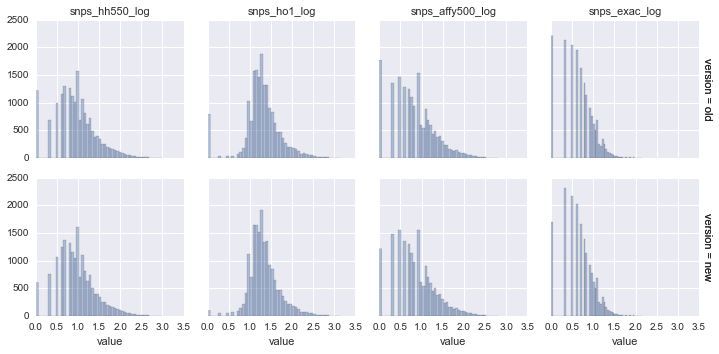

In [46]:
plot_df = pandas.melt(combined_df, id_vars = ['entrez_gene_id', 'version'])
grid = seaborn.FacetGrid(plot_df, row='version', col='variable', margin_titles=True, size=2.5)
grid.map(seaborn.distplot, 'value', kde=False)
grid.set_titles(col_template='{col_name}');
grid.savefig('figure/diagnosis-histograms.png', dpi=200)